<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/Lab01_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습 1
다음은 세 개의 숫자 1, 2, 3을 가지는 row vector를 정의한 것이다. A, B, C의 차이를 이해하자.

- 다음의 명령어들을 실행해보고, 결과를 이해하자.
  - print(A+B)
  - print(B+A)
  - print(B+C)
  - print(C+B)
  - print(A+C)
  - print(C+A)



In [ ]:
A = [1, 2, 3]
print(f"A = {A}, type : {type(A)}")

import numpy as np
B = np.array([1,2,3]) #row vector
print(f"B = {B}, type : {type(B)}")

import torch 
C = torch.tensor([1,2,3])
print(f"C = {C}, type : {type(C)}")

print(" ")
print(f"A+B : {A+B}, type : {type(A+B)}")
print(f"B+A : {B+A}, type : {type(A+B)}")
#print(f"B+C : {B+C}, type : {type(A+B)}") #->ERROR
print(f"C+B : {C+B}, type : {type(A+B)}")
#print(f"A+C : {A+C}, type : {type(A+B)}") #->ERROR
#print(f"C+A : {C+A}, type : {type(A+B)}") #->ERROR

A = [1, 2, 3], type : <class 'list'>
B = [1 2 3], type : <class 'numpy.ndarray'>
C = tensor([1, 2, 3]), type : <class 'torch.Tensor'>
 
A+B : [2 4 6], type : <class 'numpy.ndarray'>
B+A : [2 4 6], type : <class 'numpy.ndarray'>
C+B : tensor([2, 4, 6]), type : <class 'numpy.ndarray'>


## 실습 2
Google drive에 image파일들을 업로드하고 하나의 image파일을 array로 불러오고 matplotlib.pyplot을 이용하여 display해보기.
- google drive를 colab에 연결하기.
- google drive의 image file의 주소를 가져오기.
- image file을 array형태로 가져오기.
- array를 matplotlib로 display하기.


In [ ]:
# google drive colab mount 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from skimage import io
import matplotlib.pyplot as plt

In [ ]:
#img file path 가져오기 
myimg = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0313/0VGJDV20QKRS.jpg'
I = io.imread(myimg) #io.imread(IMG PATH) : array 형태로 가져오기  
print(f"I.shape : {I.shape}")
print(f"I.type : {type(I)}")


I.shape : (256, 256, 3)
I.type : <class 'numpy.ndarray'>


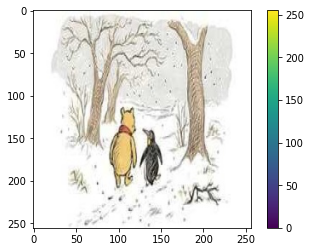

In [ ]:
plt.imshow(I)
plt.colorbar()
plt.show()

## 실습 3
Google drive에 있는 image파일들의 list를 생성하여 출력해보자.
- image들을 포함하는 폴더의 주소를 가져오기.
- 폴더 안의 image파일들의 목록을 가져오기.
- 가져온 목록을 출력하고 image파일의 개수를 확인하기.

In [ ]:
import glob
import os

In [ ]:
#IMG 포함하는 폴더 주소 가져오기 
myfolder = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0313/'
#*.jpg 형식으로 되어있어서 바꿔주기 
mylist = glob.glob(os.path.join(myfolder,'*.jpg'))

cnt = 0 
for img in mylist:
  print(f"{cnt+1} : {img}")
  if cnt>5:
    break
  cnt += 1

  

1 : /content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/penguin/59GM580Z660I.jpg
2 : /content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/penguin/BJ8TH70EW2AD.jpg
3 : /content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/penguin/KD7ZB3EB6R9I.jpg
4 : /content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/penguin/PQGHNFU20DMX.jpg
5 : /content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/penguin/HXS4968YSRF1.jpg
6 : /content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/penguin/53LAIO18IUOR.jpg
7 : /content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/penguin/T8AZRBPS1PZA.jpg


## 실습 4
생성한 list로부터 랜덤하게 N개의 파일들을 불러올 수 있는 data loader를 정의해보자.
- N과 list를 입력으로 하는 generator를 생성하자.
- generator는 image를 같은 크기로 변환하는 과정을 포함하자.
- for loop을 이용해 generator가 제대로 동작하는지 확인하자.


In [ ]:
from skimage.transform import resize
from skimage import color
import random

In [ ]:
def myimg_iter(batch_size, mylist):
  N = len(mylist)
  inds = list(range(N))
  random.shuffle(inds)

  for i in range(0,N, batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_img = np.zeros((len(batch_inds),256,256))
    batch_myfile = []

    for bi in range(0, len(batch_inds)):
      img = io.imread(mylist[batch_inds[bi]])
      if len(img.shape)==3:#img사이즈에  (256, 256, 3)를 가지고 있으므로 3일때만 resize 시킴 
        img = resize(img[:,:,1],(256,256)) #G의 색상을 가지고옴 
      else:
        img = resize(img,(256,256))
      batch_img[bi] = img
      batch_myfile.append(mylist[batch_inds[bi]].split('/')[-1])

    yield batch_img, batch_myfile

### 1번째 step ###


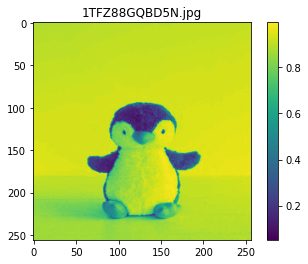

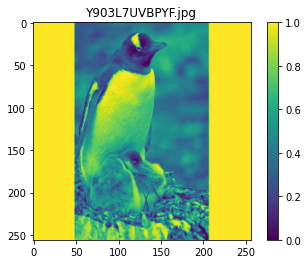

### 2번째 step ###


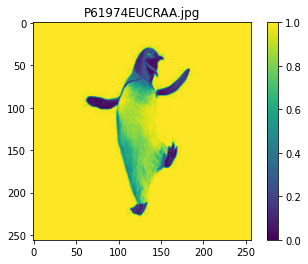

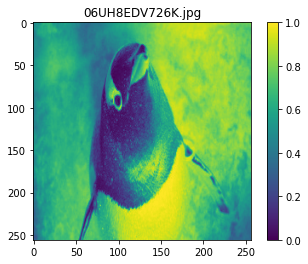

### 3번째 step ###


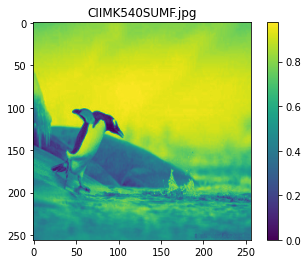

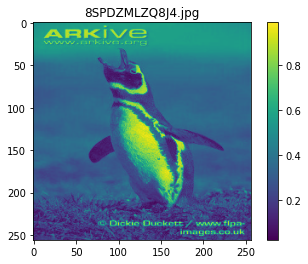

### 4번째 step ###


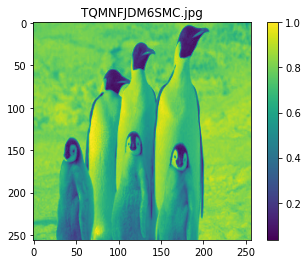

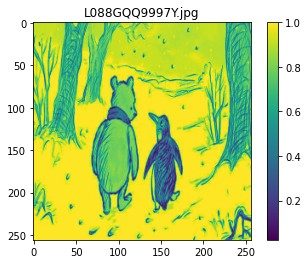

### 5번째 step ###


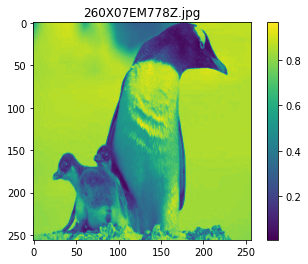

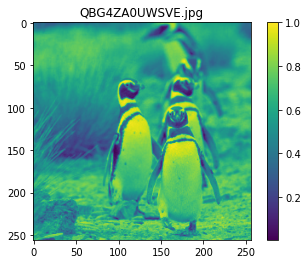

In [ ]:
myimage_iter = myimg_iter(2, mylist)
cn = 0
for X, y in myimage_iter:
  cn=cn+1
  print(f'### {cn}번째 step ###')
  for j in range(len(y)):
    plt.imshow(X[j])
    plt.title(y[j])
    plt.colorbar()
    plt.show()
  if cn>4:
    break